## 1. Prerequires
You can install the scikit-learn library using the pip Python installer, as follows:

```$sudo pip install scikit-learn matplotlib```

In [ ]:
# check scikit-learn version
import sklearn
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(sklearn.__version__)

## 2. Common Dimensionality Reduction Techniques

We use `make_classification()` function to create a test binary classification dataset.
The dataset will have ```1,000 examples``` with ```20 input features```, 10 of which are informative and 10 of which are redundant.


In [47]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# summarize the dataset
print(X.shape, y.shape)
import pandas as pd
import numpy as np
## convert to dataframe
train = pd.DataFrame(X)
train['class']=pd.Series(y)
train.head()

(1000, 20) (1000,)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,0.080548,0.822733,-1.211753,2.421184,3.304243,-6.343576,-0.369886,0.064277,0.094521,-4.364430,...,0.502341,-2.339147,0.153031,0.543728,-0.420523,1.456127,2.882609,1.791600,-4.297088,0
1,-2.330300,-4.866086,-3.882913,-2.232483,1.445153,2.597391,3.689269,-1.651189,-2.478660,-1.719449,...,-3.885896,-1.440399,3.128698,-5.370488,3.881865,0.759844,-0.145616,-0.554894,0.614208,0
2,-1.197150,1.555631,-0.618716,7.193674,-3.300375,-0.033224,4.182462,0.290963,0.886022,-0.685233,...,1.015341,2.441568,0.932073,-1.899996,-3.049732,-3.174851,1.734818,0.130674,-3.133515,0
3,1.535769,-0.733499,0.204541,0.907992,-1.142800,-2.342064,2.533897,-1.140052,4.231472,0.032415,...,2.093248,-2.800467,-2.093340,1.102820,1.385990,-0.476395,3.055135,1.764456,-1.132424,1
4,1.947908,3.409123,3.574408,-4.579258,3.181229,-2.982798,-3.618861,1.490834,3.125231,-1.153063,...,0.668844,-3.032168,-2.448262,2.317296,5.087334,1.568465,-0.429839,1.992009,2.669929,0


### 2.1 Missing Value Ratio


In [46]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
class    0.0
dtype: float64

In [85]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

### 2.2 Low Variance Filter

The variables with a low variance will not affect the target variable. So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset.
Dataframe supports ```.var()``` methods for such purpose.

In [86]:
train.var()

0         4.905241
1         9.941251
2         4.348611
3        19.574028
4         7.560405
5        16.087825
6        10.791600
7         4.259212
8        13.435237
9         4.473907
10        3.625765
11       13.805811
12        4.064385
13        4.379133
14       15.349630
15       20.581083
16        5.095812
17        9.197114
18        3.272266
19        4.545181
class     0.250225
dtype: float64

In [63]:
numeric = train[['class']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i+1])

### 2.3 High Correlation filter
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). 
We can use ```.corr()``` method in DataFrame

In [53]:
df=train.drop('class', 1)
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.291479,0.044241,-0.051087,-0.566282,-0.034016,0.046873,-0.015271,0.596412,0.273614,-0.395720,0.272480,0.225309,-0.067886,0.721090,-0.116175,-0.221489,-0.011673,0.205774,-0.055261
1,-0.291479,1.000000,0.700818,0.316275,0.536765,-0.319397,-0.580430,0.709933,-0.096363,-0.199641,-0.209591,0.160872,0.223277,-0.254947,-0.055736,-0.120866,0.134904,-0.337302,0.291414,-0.020054
2,0.044241,0.700818,1.000000,-0.299172,0.253437,0.204966,-0.396191,0.401770,0.231982,0.081325,-0.135360,0.150301,0.040856,0.124880,-0.132545,0.135038,0.118302,-0.050234,0.168349,0.243560
3,-0.051087,0.316275,-0.299172,1.000000,0.018517,-0.651777,-0.282203,0.352717,-0.186072,0.029574,-0.012260,0.395806,0.357270,-0.665413,0.357786,-0.611683,0.043395,-0.342383,0.192933,-0.658378
4,-0.566282,0.536765,0.253437,0.018517,1.000000,-0.226579,-0.493181,0.380213,-0.290017,-0.164106,-0.185180,-0.002842,-0.263917,-0.043315,-0.334748,0.013682,0.560808,-0.362134,0.388384,0.083105
5,-0.034016,-0.319397,0.204966,-0.651777,-0.226579,1.000000,0.152103,-0.468021,-0.188736,0.043612,0.527821,0.106410,0.100113,0.718546,-0.488488,0.405869,0.239796,0.000025,-0.481145,0.444578
6,0.046873,-0.580430,-0.396191,-0.282203,-0.493181,0.152103,1.000000,-0.488995,0.452699,-0.132957,0.312210,-0.467180,-0.348349,0.359999,-0.190696,0.366693,-0.689512,0.687957,0.083723,0.081989
7,-0.015271,0.709933,0.401770,0.352717,0.380213,-0.468021,-0.488995,1.000000,0.173421,-0.199139,-0.229193,-0.179198,0.121964,-0.179085,0.029033,0.051244,-0.016624,-0.505679,0.272616,0.083479
8,0.596412,-0.096363,0.231982,-0.186072,-0.290017,-0.188736,0.452699,0.173421,1.000000,0.233156,-0.216075,-0.228520,-0.327080,0.099462,0.251356,0.153699,-0.548766,0.407846,0.583858,-0.005921
9,0.273614,-0.199641,0.081325,0.029574,-0.164106,0.043612,-0.132957,-0.199139,0.233156,1.000000,-0.112404,0.330993,0.060027,-0.215055,0.349592,-0.612740,0.118137,0.104992,0.109800,-0.317078


### 2.4 Random Forest
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

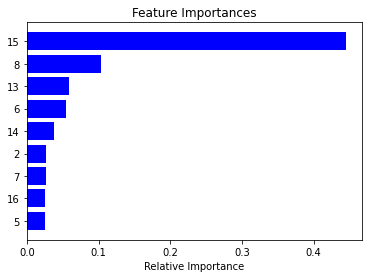

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train['class'])
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [88]:
# evaluate logistic regression model on raw data
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the model
model = LogisticRegression()
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


### 2.5 Principal Component Analysis
Principal Component Analysis, or PCA, might be the most popular technique for dimensionality reduction with dense data (few zero values).

In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

### 2.6 Locally Linear Embedding
Locally Linear Embedding, or LLE, creates an embedding of the dataset and attempts to preserve the relationships between neighborhoods in the dataset.

![alt text](https://thetalog.com/images/machine-learning/locally-linear-embedding/manifoldlearning_thetalog.png "Title")
![alt text](https://thetalog.com/images/machine-learning/locally-linear-embedding/lle_viz.gif "Title")



In [87]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)


### 3. PCA Explained

#### 3.1 Principal Component Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal linear transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

![alt text](https://lh6.googleusercontent.com/EQCguiagMeAptcwEhi1RP49WjLaWVR9s6aihUVzHUlYVpYyJK1EoTD4DbVjV77TpUM6gHe0pXeB6wyt9732_KKGtWMP6m_WHuphClravQ7LssDx_3ANyOu8VpiOfiIofdGBI5T0 "Title")

![alt text](https://lh3.googleusercontent.com/IlPla42NUww_Fbbv5zjFjtUDD9sxhik2px7X56VW8kdmdY8jZWz1YR44pp-CrsHErHzoUpMODb8h-UCIysHOSEaq0T3ybeDG3LNu6t-Ecn1W9CqhUWXJLfvnkKH_KdMPLYhf8kU "Title")


#### 3.2 PCA Algorithm

<img src="http://xijun-album.oss-cn-hangzhou.aliyuncs.com/20190316Reunderstanding_PCA/Procedure%20of%20PCA.png" alt="Drawing" align="left" style="width: 50%;"/>


#### Step 1. Load Data 


In [89]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# First Load the dataset to a matrix:

iris = load_iris()
dataset = np.array(iris.data)
dataset[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

#### Step 2. Calculate the covariance matrix:

Variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures the spread of a set of numbers from their mean. The mathematical definition is:

![](https://miro.medium.com/max/321/1*W3v_zA6XngcZ63TXAIZEiw.png)

Covariance is a measure of the joint variability of two random variables. In other words, how any 2 features vary from each other. Using the covariance is very common when looking for patterns in data. The mathematical definition is:

![](https://miro.medium.com/max/617/1*iIcmw9AR70_ZzbsHfZvL6w.png)

In [72]:
covariance_matrix = pd.DataFrame(data = np.cov(dataset, rowvar = False), columns = iris.feature_names, index = iris.feature_names)
covariance_matrix.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


#### Step 3. Calculate the eigenvalues and eigenvectors:

eigenvalues and eigenvectors are the basic terms of math please take a alook on(https://www.mathsisfun.com/algebra/eigenvalue.html) A simple example is that an eigenvector does not change direction in a transformation:

<img src="https://www.mathsisfun.com/algebra/images/eigen-transform.svg" align="left" style="width: 30%;"/>
</br>

For a square matrix A, an Eigenvector and Eigenvalue make this equation true:

![](https://www.mathsisfun.com/algebra/images/eigenvalue.svg)

The eigenvector associated with the largest eigenvalue indicates the direction in which the data has the most variance. Hence, using eigenvalues we will know what eigenvectors capture the most variability in our data.

<img src="https://i.stack.imgur.com/lNHqt.gif " alt="Drawing" align="left" style="width: 50%;"/>


In [73]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


#### Step 4. Choose the first K eigenvalues (K principal components/axises):


In [75]:

totalSum = sum(eigenvalues)
variables_explained = [(i / totalSum) for i in sorted(eigenvalues, reverse = True)]

In [84]:
variables_explained

[0.9246187232017268,
 0.05306648311706791,
 0.017102609807929672,
 0.005212183873275513]

In [83]:
feature_vector = eigenvectors[:,:2]
feature_vector

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

####  Step 5. Build the new reduced dataset:

<img src="https://miro.medium.com/max/648/1*hhxeK-lJ9z1h0lK-hHdVaQ.png" alt="Drawing"  style="width: 30%;"/>

Matrix multiplication

<img src="https://miro.medium.com/max/700/1*1mWiBY253nTA2pwq0195Ag.png" alt="Drawing"  style="width: 30%;"/>


In [79]:
feature_vector_transpose = np.transpose(feature_vector)
dataset_transpose = np.transpose(dataset)
new_dataset_transpose = np.matmul(feature_vector_transpose, datasetTranspose)
new_dataset = np.transpose(new_dataset_transpose)

In [82]:
new_dataset[0:3]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315]])

### 4. Reference 
* https://medium.com/free-code-camp/an-overview-of-principal-component-analysis-6340e3bc4073
* https://builtin.com/data-science/step-step-explanation-principal-component-analysis
* https://xijunlee.github.io/2019/03/10/reunderstanding-of-PCA/
* https://medium.com/free-code-camp/an-overview-of-principal-component-analysis-6340e3bc4073
* http://xijun-album.oss-cn-hangzhou.aliyuncs.com/20190316Reunderstanding_PCA/Procedure%20of%20PCA.png